In [1]:
#### Will Continue Soon
import numpy as np
import matplotlib.pyplot as plt

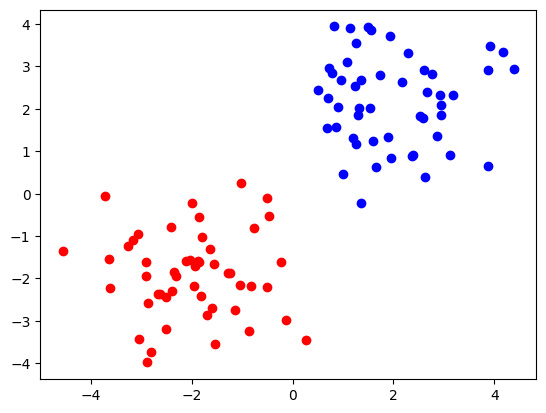

In [7]:
# Generate a synthetic dataset
np.random.seed(0)
# Class 1
X0 = np.random.randn(50, 2) - 2
# Other Class
X1 = np.random.randn(50, 2) + 2

# Merging the data
X = np.vstack((X0, X1))
y = np.hstack((np.zeros(50), np.ones(50)))

# Plot the data
plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')

In [8]:
# Define logistic regression function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for i in range(num_iterations):
        # Forward 
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Backward 
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model=LogisticRegression()

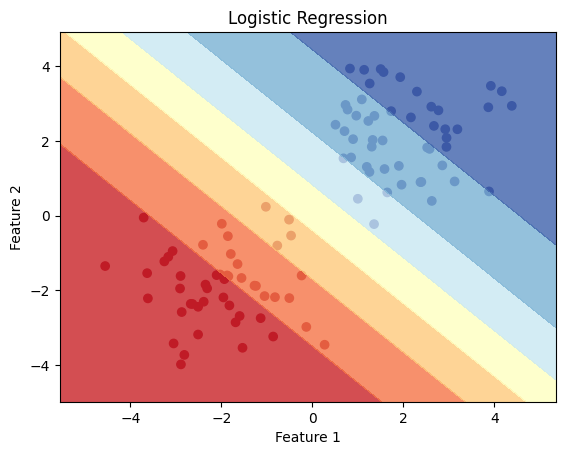

In [9]:

# Train logistic regression model
num_iterations = 10
learning_rate = 0.1
weights, bias = logistic_regression(X, y, num_iterations, learning_rate)

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.show()

In [16]:
def svm_fit(X, y, learning_rate=0.01, lambda_param=0.001, num_iterations=100):
    num_samples, num_features = X.shape
    # Initialize parameters
    weights = np.zeros(num_features)
    bias = 0

    # Gradient descent optimization
    for _ in range(num_iterations):
        # Calculate hinge loss and gradients
        loss = 0
        dw = np.zeros(num_features)
        db = 0

        for i in range(num_samples):
            if y[i] * (np.dot(X[i], weights) + bias) < 1:
                loss += 1 - y[i] * (np.dot(X[i], weights) + bias)
                dw += -y[i] * X[i]
                db += -y[i]

        # Update parameters
        weights -= learning_rate * (dw + 2 * lambda_param * weights)
        bias -= learning_rate * db

    return weights, bias

def svm_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.sign(linear_output)

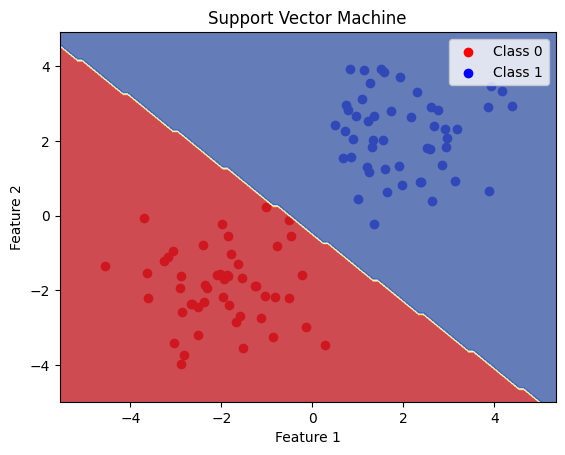

In [17]:
# Create and train SVM model
weights, bias = svm_fit(X, y)

# Plottting
plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine')
plt.legend()
plt.show()
